In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library
import requests

# Import the API key
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-21.75474643888319 25.238192266444713
-68.18261862370045 -148.49895010049045
-75.77227352217272 -54.488659717035844
-21.632223105507464 -47.57357226176856
86.26078397161388 -162.978625724014
45.80634472957033 158.96430458508763
-23.03311880958225 -161.83661634164451
-37.34848799585072 -88.8913998081384
68.20567558630731 -102.2914904118314
69.61229034896652 51.93261727027519
48.88684581358842 -60.81671378952534
41.93880286283408 129.32698536053653
46.05340399243951 -84.34412286387862
-45.749802927328616 -21.430920955946334
-7.134043415180088 154.87599141769135
-11.884350735265187 165.32669768899564
-48.37248011637393 70.743095605212
-56.86663475853657 171.89586519075903
82.77317526098261 147.45041600317427
-3.343693993710602 -5.4113249452480545
84.79174097111837 -98.34084198956228
-15.52303436192257 -14.469655986333464
28.89996693691934 69.31833942366038
-48.74957023060332 -50.24042662019795
13.189854821810385 -55.9386590496142
-36.362978649335474 146.8813808530403
-86.37489472072282 15

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | letlhakane
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | santa rita do passa quatro
Processing Record 5 of Set 1 | barrow
Processing Record 6 of Set 1 | severo-kurilsk
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | thompson
Processing Record 10 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 11 of Set 1 | cap-aux-meules
Processing Record 12 of Set 1 | helong
Processing Record 13 of Set 1 | sault sainte marie
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | buin
Processing Record 16 of Set 1 | lata
Processing Record 17 of Set 1 | souillac
Processing Record 18 of Set 1 | kaitangata
Processing Record 19 of Set 1 | chokurdakh
Processing Record 20 of Set 1 | tabou
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 o

Processing Record 36 of Set 4 | zolotinka
City not found. Skipping...
Processing Record 37 of Set 4 | broome
Processing Record 38 of Set 4 | tomatlan
Processing Record 39 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 40 of Set 4 | faanui
Processing Record 41 of Set 4 | hobart
Processing Record 42 of Set 4 | kindu
Processing Record 43 of Set 4 | kimberley
Processing Record 44 of Set 4 | porto belo
Processing Record 45 of Set 4 | hualmay
Processing Record 46 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 47 of Set 4 | ulladulla
Processing Record 48 of Set 4 | leninskoye
Processing Record 49 of Set 4 | brae
Processing Record 50 of Set 4 | san patricio
Processing Record 1 of Set 5 | bandarbeyla
Processing Record 2 of Set 5 | baltasi
Processing Record 3 of Set 5 | butterworth
Processing Record 4 of Set 5 | susanville
Processing Record 5 of Set 5 | olga
Processing Record 6 of Set 5 | victoria
Processing Record 7 of Set 5 | doha
Process

Processing Record 28 of Set 8 | vidim
Processing Record 29 of Set 8 | uarini
Processing Record 30 of Set 8 | darhan
Processing Record 31 of Set 8 | vila
Processing Record 32 of Set 8 | ostrovnoy
Processing Record 33 of Set 8 | pingliang
Processing Record 34 of Set 8 | comodoro rivadavia
Processing Record 35 of Set 8 | correntina
Processing Record 36 of Set 8 | omboue
Processing Record 37 of Set 8 | puerto colombia
Processing Record 38 of Set 8 | vestmanna
Processing Record 39 of Set 8 | saint-augustin
Processing Record 40 of Set 8 | tarut
Processing Record 41 of Set 8 | okhotsk
Processing Record 42 of Set 8 | krasnyye tkachi
Processing Record 43 of Set 8 | novyy urengoy
Processing Record 44 of Set 8 | karratha
Processing Record 45 of Set 8 | sai buri
Processing Record 46 of Set 8 | shimoda
Processing Record 47 of Set 8 | kenai
Processing Record 48 of Set 8 | marystown
Processing Record 49 of Set 8 | oussouye
Processing Record 50 of Set 8 | shirokiy
Processing Record 1 of Set 9 | great 

Processing Record 16 of Set 12 | agva
City not found. Skipping...
Processing Record 17 of Set 12 | eenhana
Processing Record 18 of Set 12 | usinsk
Processing Record 19 of Set 12 | ma-ao
Processing Record 20 of Set 12 | finote selam
Processing Record 21 of Set 12 | muros
Processing Record 22 of Set 12 | puksoozero
Processing Record 23 of Set 12 | sumbawa
City not found. Skipping...
Processing Record 24 of Set 12 | linhai
Processing Record 25 of Set 12 | tianpeng
Processing Record 26 of Set 12 | sosnovoborsk
Processing Record 27 of Set 12 | pekan
Processing Record 28 of Set 12 | murakami
Processing Record 29 of Set 12 | nueva helvecia
Processing Record 30 of Set 12 | santa rita
Processing Record 31 of Set 12 | marawi
Processing Record 32 of Set 12 | chimore
Processing Record 33 of Set 12 | vaitape
Processing Record 34 of Set 12 | yenagoa
Processing Record 35 of Set 12 | merauke
Processing Record 36 of Set 12 | rolim de moura
City not found. Skipping...
Processing Record 37 of Set 12 | mi

In [9]:
len(city_data)

555

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Letlhakane,-21.4167,25.5833,81.36,29,0,8.08,BW,2022-11-09 18:53:33
1,Mataura,-46.1927,168.8643,44.47,78,5,2.08,NZ,2022-11-09 18:49:25
2,Ushuaia,-54.8000,-68.3000,51.42,66,40,31.07,AR,2022-11-09 18:48:42
3,Santa Rita Do Passa Quatro,-21.7103,-47.4781,82.40,48,76,8.88,BR,2022-11-09 18:52:20
4,Barrow,71.2906,-156.7887,28.42,86,0,10.36,US,2022-11-09 18:50:45
5,Severo-Kurilsk,50.6789,156.1250,34.18,67,22,9.10,RU,2022-11-09 18:49:22
6,Avarua,-21.2078,-159.7750,77.05,73,12,12.66,CK,2022-11-09 18:49:21
7,Lebu,-37.6167,-73.6500,59.94,69,98,17.83,CL,2022-11-09 18:50:38
8,Thompson,55.7435,-97.8558,8.76,78,75,8.05,CA,2022-11-09 18:51:45
9,Cap-Aux-Meules,47.3821,-61.8597,39.25,60,75,24.16,CA,2022-11-09 18:53:34


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Letlhakane,BW,2022-11-09 18:53:33,-21.4167,25.5833,81.36,29,0,8.08
1,Mataura,NZ,2022-11-09 18:49:25,-46.1927,168.8643,44.47,78,5,2.08
2,Ushuaia,AR,2022-11-09 18:48:42,-54.8000,-68.3000,51.42,66,40,31.07
3,Santa Rita Do Passa Quatro,BR,2022-11-09 18:52:20,-21.7103,-47.4781,82.40,48,76,8.88
4,Barrow,US,2022-11-09 18:50:45,71.2906,-156.7887,28.42,86,0,10.36
5,Severo-Kurilsk,RU,2022-11-09 18:49:22,50.6789,156.1250,34.18,67,22,9.10
6,Avarua,CK,2022-11-09 18:49:21,-21.2078,-159.7750,77.05,73,12,12.66
7,Lebu,CL,2022-11-09 18:50:38,-37.6167,-73.6500,59.94,69,98,17.83
8,Thompson,CA,2022-11-09 18:51:45,55.7435,-97.8558,8.76,78,75,8.05
9,Cap-Aux-Meules,CA,2022-11-09 18:53:34,47.3821,-61.8597,39.25,60,75,24.16


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

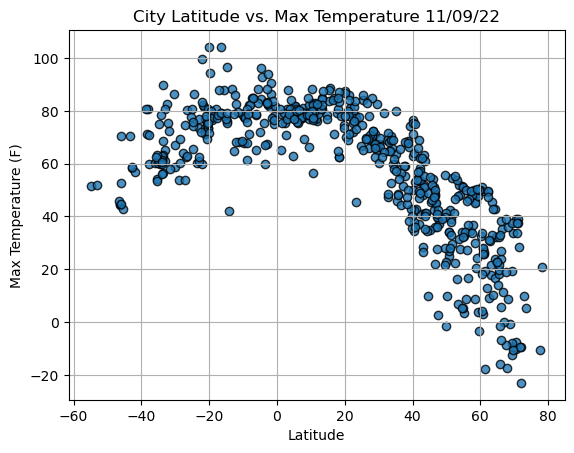

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

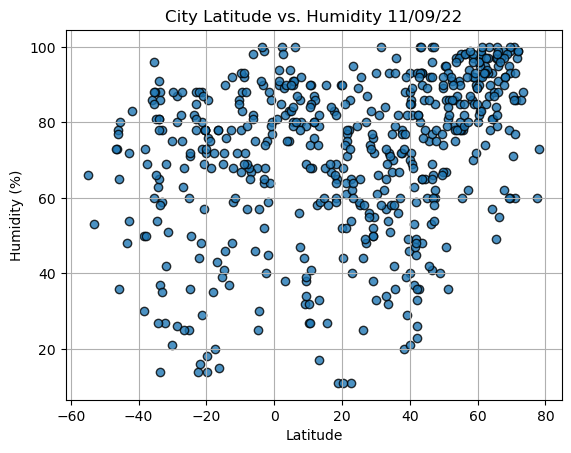

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

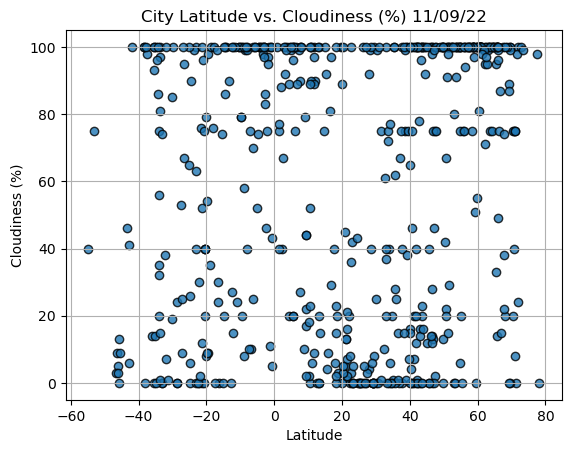

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

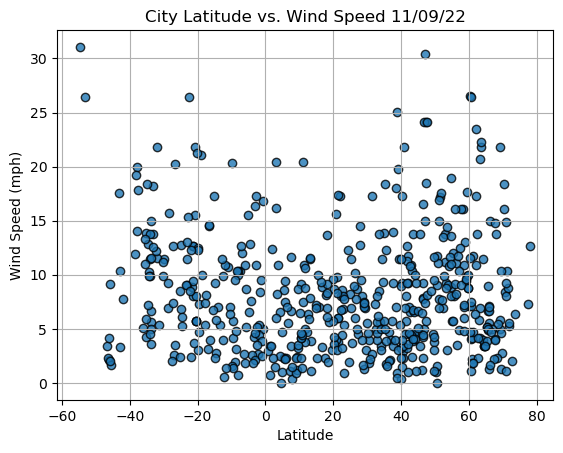

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [30]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(f"The r-value is {r_value:.3f}")

In [31]:
index13 = city_data_df.loc[13]
index13

City                         Buin
Country                        CL
Date          2022-11-09 18:53:35
Lat                      -33.7333
Lng                        -70.75
Max Temp                    62.11
Humidity                       37
Cloudiness                    100
Wind Speed                   3.56
Name: 13, dtype: object

In [32]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3      False
4       True
       ...  
550    False
551     True
552     True
553     True
554    False
Name: Lat, Length: 555, dtype: bool

In [33]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Barrow,US,2022-11-09 18:50:45,71.2906,-156.7887,28.42,86,0,10.36
5,Severo-Kurilsk,RU,2022-11-09 18:49:22,50.6789,156.1250,34.18,67,22,9.10
8,Thompson,CA,2022-11-09 18:51:45,55.7435,-97.8558,8.76,78,75,8.05
9,Cap-Aux-Meules,CA,2022-11-09 18:53:34,47.3821,-61.8597,39.25,60,75,24.16
10,Helong,CN,2022-11-09 18:53:35,42.5397,128.9972,40.82,82,100,4.59


In [34]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

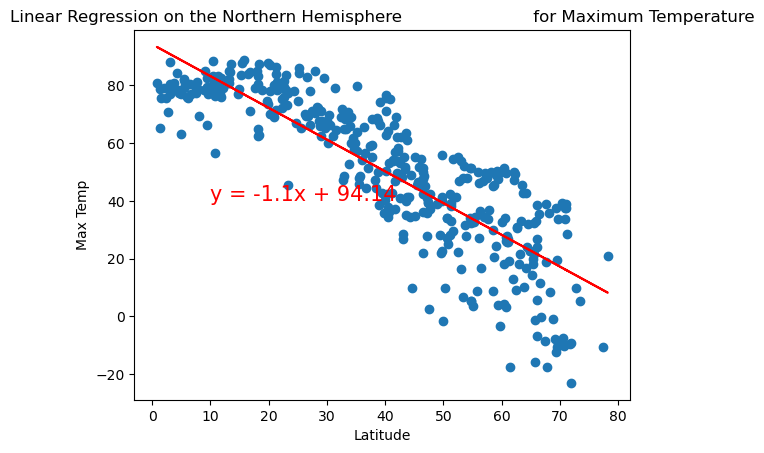

The r-value is -0.850


In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

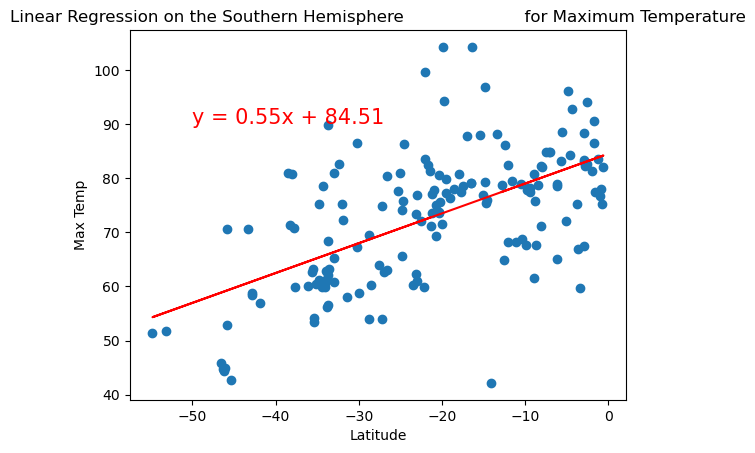

The r-value is 0.594


In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
#  Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                      for Maximum Temperature', 'Max Temp', (-50,90))

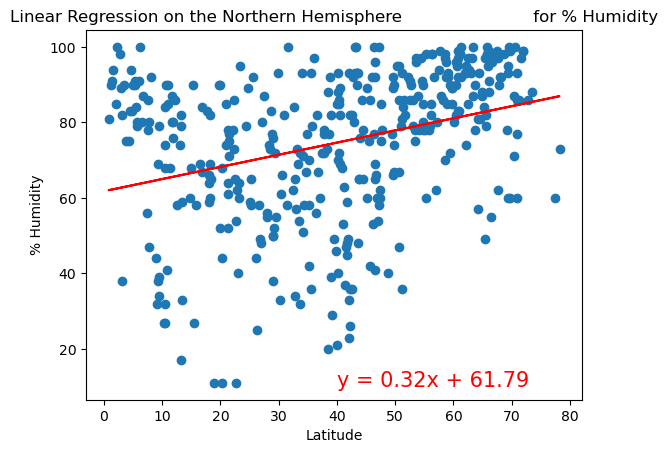

The r-value is 0.323


In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

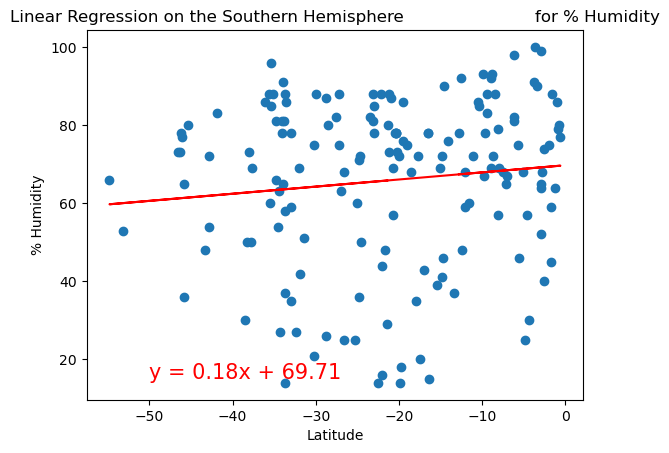

The r-value is 0.114


In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

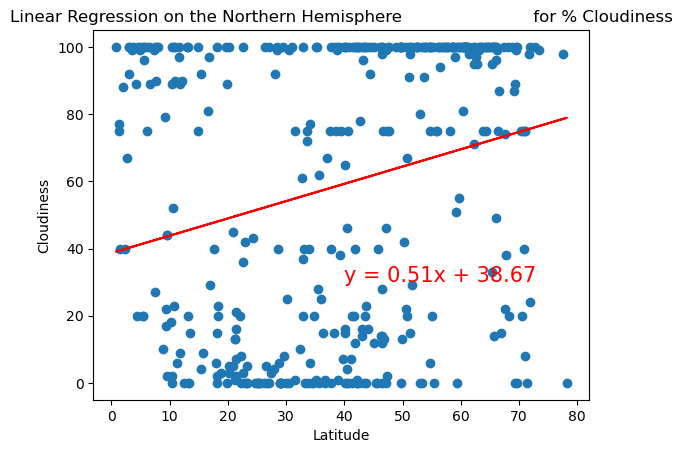

The r-value is 0.247


In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', 'Cloudiness',(40,30))

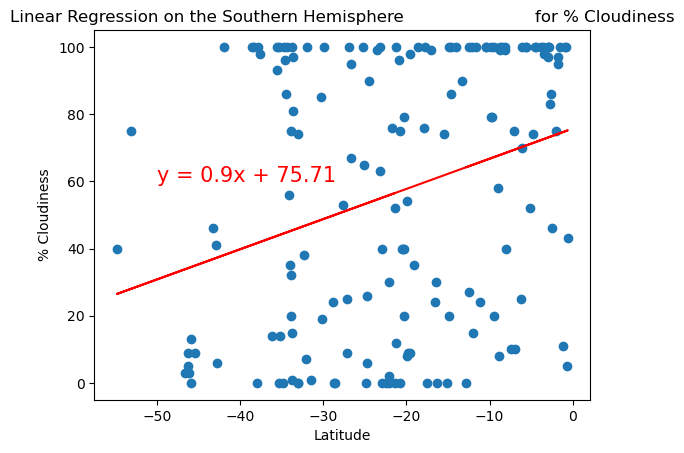

The r-value is 0.297


In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

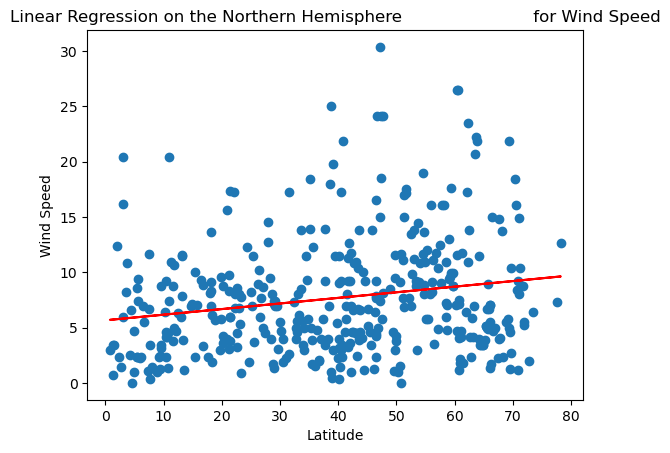

The r-value is 0.192


In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

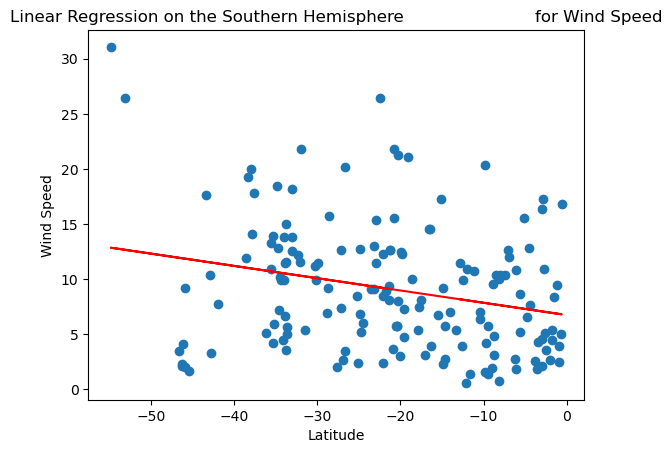

The r-value is -0.254


In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))